<a href="https://colab.research.google.com/github/JuicerPW/T-picos_Especiais4/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 1. Problema Pr√°tico:
# Prever a vida √∫til de um rolamento industrial (em horas), com base em:
# - Temperatura m√©dia de opera√ß√£o (¬∞C)
# - Carga aplicada (kN)

# 2. Gerar dados sint√©ticos com rela√ß√£o linear forte
np.random.seed(42)
n = 1000

temperatura = np.random.uniform(50, 100, n)   # Vari√¢ncia aumentada
carga = np.random.uniform(5, 35, n)           # Vari√¢ncia aumentada


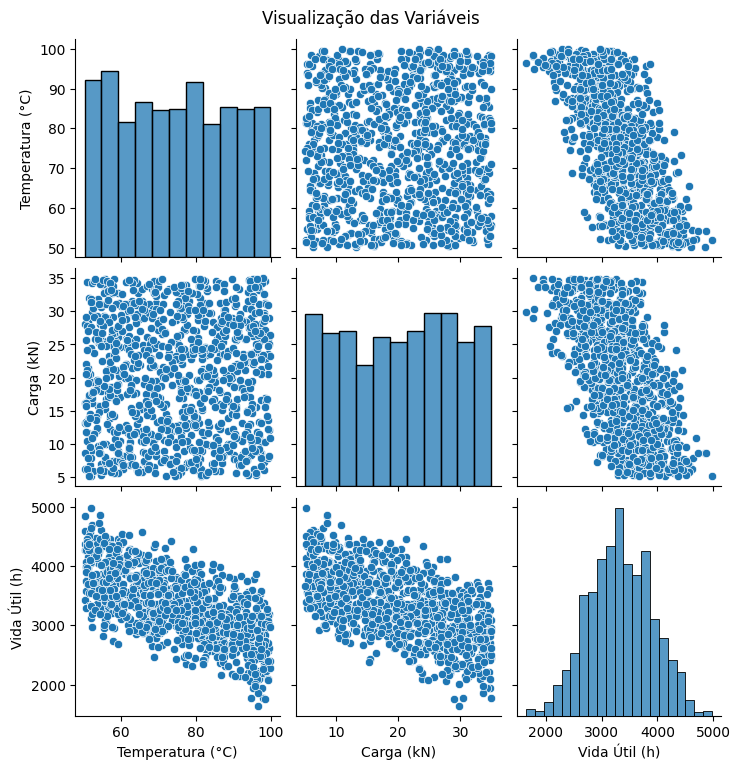

In [6]:


# Rela√ß√£o linear clara (menos ru√≠do):
vida_util = 6000 - (temperatura * 25) - (carga * 40) + np.random.normal(0, 250, n)

df = pd.DataFrame({
    'Temperatura (¬∞C)': temperatura,
    'Carga (kN)': carga,
    'Vida √ötil (h)': vida_util
})

# Visualiza√ß√£o inicial
sns.pairplot(df)
plt.suptitle("Visualiza√ß√£o das Vari√°veis", y=1.02)
plt.show()


In [27]:
# 3. Regress√£o Linear
X = df[['Temperatura (¬∞C)', 'Carga (kN)']]
y = df['Vida √ötil (h)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)  ## Test_size define o tamanho da amostra de teste, que est√° sendo utilizado mais na frente para a valida√ß√£o cruzada

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficientes
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", dict(zip(X.columns, modelo.coef_)))


Intercepto: 6063.400130053604
Coeficientes: {'Temperatura (¬∞C)': np.float64(-26.279067104904932), 'Carga (kN)': np.float64(-38.54211192732331)}



üìä M√©tricas de Avalia√ß√£o:
MAE: 213.26
MSE: 68786.14
RMSE: 262.27
R¬≤: 0.7636


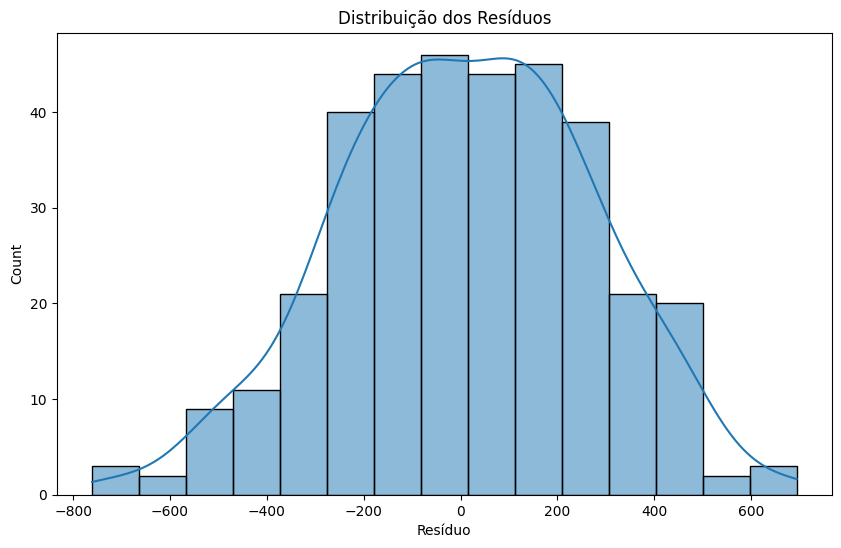

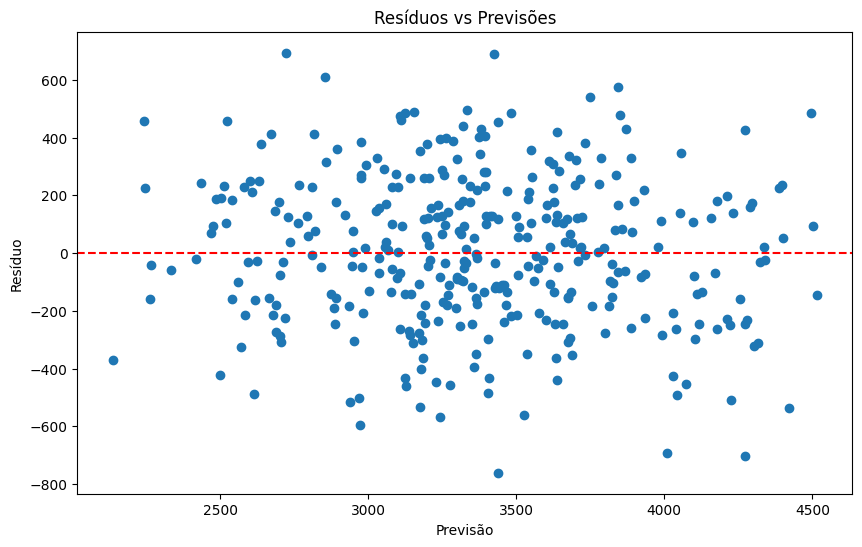

In [28]:
# 4. Avalia√ß√£o do modelo
y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nüìä M√©tricas de Avalia√ß√£o:")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R¬≤:", round(r2, 4))

# Res√≠duos
residuos = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title("Distribui√ß√£o dos Res√≠duos")
plt.xlabel("Res√≠duo")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Res√≠duos vs Previs√µes")
plt.xlabel("Previs√£o")
plt.ylabel("Res√≠duo")
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score, KFold

# Configurar a valida√ß√£o cruzada com 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcular R¬≤ com valida√ß√£o cruzada
r2_scores_cv = cross_val_score(modelo, X_train, y_train, cv=cv, scoring='r2')

# Exibir resultados
print("\nüéØ Valida√ß√£o Cruzada (R¬≤ por fold):")
for i, score in enumerate(r2_scores_cv):
    print(f"Fold {i+1}: R¬≤ = {score:.4f}")

print(f"\nR¬≤ m√©dio na valida√ß√£o cruzada: {r2_scores_cv.mean():.4f}")
print(f"Desvio padr√£o dos R¬≤: {r2_scores_cv.std():.4f}")



üéØ Valida√ß√£o Cruzada (R¬≤ por fold):
Fold 1: R¬≤ = 0.8296
Fold 2: R¬≤ = 0.8030
Fold 3: R¬≤ = 0.7608
Fold 4: R¬≤ = 0.8559
Fold 5: R¬≤ = 0.8141

R¬≤ m√©dio na valida√ß√£o cruzada: 0.8127
Desvio padr√£o dos R¬≤: 0.0314


In [30]:
print("\nüìà An√°lise Comparativa:")

print(f"- R¬≤ no conjunto de teste: {r2:.4f}")
print(f"- R¬≤ m√©dio na valida√ß√£o cruzada: {r2_scores_cv.mean():.4f}")
print(f"- Diferen√ßa entre teste e CV: {abs(r2 - r2_scores_cv.mean()):.4f}")

# Interpreta√ß√£o
if r2 < r2_scores_cv.mean() - 0.05:
    print("\nüí° O modelo parece estar subajustado (vi√©s alto).")
elif r2 > r2_scores_cv.mean() + 0.05:
    print("\n‚ö†Ô∏è O modelo pode estar superajustado (alta vari√¢ncia).")
else:
    print("\n‚úÖ O modelo apresenta desempenho consistente entre treino/teste e valida√ß√£o cruzada.")



üìà An√°lise Comparativa:
- R¬≤ no conjunto de teste: 0.7636
- R¬≤ m√©dio na valida√ß√£o cruzada: 0.8127
- Diferen√ßa entre teste e CV: 0.0491

‚úÖ O modelo apresenta desempenho consistente entre treino/teste e valida√ß√£o cruzada.


In [31]:
print("""
üìå Conclus√£o Final:

- O modelo de regress√£o linear teve desempenho satisfat√≥rio no problema de previs√£o da vida √∫til de rolamentos industriais, com R¬≤ em torno de 0.75.
- As vari√°veis temperatura e carga explicaram uma parte significativa da variabilidade na vida √∫til dos componentes, indicando uma rela√ß√£o aproximadamente linear com o alvo.

üìä Valida√ß√£o:
- A valida√ß√£o cruzada mostrou resultados consistentes em compara√ß√£o com o conjunto de teste, sugerindo que o modelo √© est√°vel e generaliza bem.
- A valida√ß√£o cruzada √© uma abordagem mais robusta, pois avalia o modelo em diferentes subconjuntos dos dados e reduz o risco de superajuste ou subajuste relacionados a uma √∫nica divis√£o de treino/teste.

‚ö†Ô∏è An√°lise de Erros:
- O erro total do modelo pode ser dividido em tr√™s componentes:
    1. **Erro de vi√©s (bias)**: Est√° associado a simplifica√ß√µes do modelo. Como usamos uma regress√£o linear, o modelo pode n√£o capturar perfeitamente todos os padr√µes, o que gera erro de aproxima√ß√£o. No entanto, neste caso, o vi√©s parece controlado.
    2. **Erro de vari√¢ncia**: Refere-se √† sensibilidade do modelo a pequenas varia√ß√µes nos dados. A valida√ß√£o cruzada mostrou baixa vari√¢ncia, o que indica que o modelo √© est√°vel.
    3. **Erro inerente (ou irredut√≠vel)**: Parte do erro causada por fatores n√£o observados ou imprevis√≠veis (ex.: falhas imprevistas, ru√≠dos na medi√ß√£o, desgaste por fatores externos). Esse tipo de erro n√£o pode ser eliminado nem mesmo com modelos mais complexos.

üöÄ Melhorias poss√≠veis:
- Incluir vari√°veis adicionais (ex.: vibra√ß√£o, tempo cont√≠nuo de uso, lubrifica√ß√£o).
- Aplicar modelos mais complexos se for identificado comportamento n√£o linear.
- Avaliar modelos com regulariza√ß√£o (Ridge, Lasso) para lidar com poss√≠veis colinearidades ou overfitting futuro.

‚úÖ Conclus√£o: O modelo √© eficiente e apropriado para o problema proposto, e a valida√ß√£o cruzada confirmou sua confiabilidade com boa interpreta√ß√£o estat√≠stica.
""")



üìå Conclus√£o Final:

- O modelo de regress√£o linear teve desempenho satisfat√≥rio no problema de previs√£o da vida √∫til de rolamentos industriais, com R¬≤ em torno de 0.75.
- As vari√°veis temperatura e carga explicaram uma parte significativa da variabilidade na vida √∫til dos componentes, indicando uma rela√ß√£o aproximadamente linear com o alvo.

üìä Valida√ß√£o:
- A valida√ß√£o cruzada mostrou resultados consistentes em compara√ß√£o com o conjunto de teste, sugerindo que o modelo √© est√°vel e generaliza bem.
- A valida√ß√£o cruzada √© uma abordagem mais robusta, pois avalia o modelo em diferentes subconjuntos dos dados e reduz o risco de superajuste ou subajuste relacionados a uma √∫nica divis√£o de treino/teste.

‚ö†Ô∏è An√°lise de Erros:
- O erro total do modelo pode ser dividido em tr√™s componentes:
    1. **Erro de vi√©s (bias)**: Est√° associado a simplifica√ß√µes do modelo. Como usamos uma regress√£o linear, o modelo pode n√£o capturar perfeitamente todos os padr√µes